## Logistic regression (bank data)

### import required lib

In [100]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,classification_report,roc_curve

### import dataset

In [2]:
bank_data = pd.read_csv('bank-full.csv',sep=';')
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


### Initial analysis

In [3]:
bank_data.shape

(45211, 17)

In [6]:
bank_data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [4]:
bank_data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [6]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [10]:
bank_data[bank_data.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [14]:
pd.set_option('display.max_columns',None)
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [15]:
bank_data['job'].nunique()

12

In [16]:
bank_data['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [18]:
bank_data['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [20]:
print('nunique in marital :',bank_data['marital'].nunique())
print('unique in marital :',bank_data['marital'].unique())
print('values count in marital :',bank_data['marital'].value_counts())

nunique in marital : 3
unique in marital : ['married' 'single' 'divorced']
values count in marital : married     27214
single      12790
divorced     5207
Name: marital, dtype: int64


In [22]:
print('nunique in education :',bank_data['education'].nunique())
print('unique in education :',bank_data['education'].unique())
print('values count in education :',bank_data['education'].value_counts())

nunique in education : 4
unique in education : ['tertiary' 'secondary' 'unknown' 'primary']
values count in education : secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64


In [23]:
print('nunique in contact :',bank_data['contact'].nunique())
print('unique in contact :',bank_data['contact'].unique())
print('values count in contact :',bank_data['contact'].value_counts())

nunique in contact : 3
unique in contact : ['unknown' 'cellular' 'telephone']
values count in contact : cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64


In [24]:
print('nunique in month :',bank_data['month'].nunique())
print('unique in month :',bank_data['month'].unique())
print('values count in month :',bank_data['month'].value_counts())

nunique in month : 12
unique in month : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
values count in month : may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64


In [25]:
print('nunique in poutcome :',bank_data['poutcome'].nunique())
print('unique in poutcome :',bank_data['poutcome'].unique())
print('values count in poutcome :',bank_data['poutcome'].value_counts())

nunique in poutcome : 4
unique in poutcome : ['unknown' 'failure' 'other' 'success']
values count in poutcome : unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64


###  use one hot encoding for categorical data

In [26]:
bank_data1 = pd.get_dummies(data = bank_data,columns = ['job','marital','education','contact','poutcome'])
bank_data1

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,no,2143,yes,no,5,may,261,1,-1,0,no,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
1,44,no,29,yes,no,5,may,151,1,-1,0,no,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
2,33,no,2,yes,yes,5,may,76,1,-1,0,no,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
3,47,no,1506,yes,no,5,may,92,1,-1,0,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
4,33,no,1,no,no,5,may,198,1,-1,0,no,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,17,nov,977,3,-1,0,yes,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1
45207,71,no,1729,no,no,17,nov,456,2,-1,0,yes,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
45208,72,no,5715,no,no,17,nov,1127,5,184,3,yes,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
45209,57,no,668,no,no,17,nov,508,4,-1,0,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1


In [28]:
bank_data2 = bank_data1.replace({'month':{'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,
                                          'sep':9,'oct':10,'nov':11,'dec':12}})
bank_data2

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,no,2143,yes,no,5,5,261,1,-1,0,no,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
1,44,no,29,yes,no,5,5,151,1,-1,0,no,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
2,33,no,2,yes,yes,5,5,76,1,-1,0,no,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
3,47,no,1506,yes,no,5,5,92,1,-1,0,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
4,33,no,1,no,no,5,5,198,1,-1,0,no,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,17,11,977,3,-1,0,yes,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1
45207,71,no,1729,no,no,17,11,456,2,-1,0,yes,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
45208,72,no,5715,no,no,17,11,1127,5,184,3,yes,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
45209,57,no,668,no,no,17,11,508,4,-1,0,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1


In [29]:
print('unique in dafault :',bank_data2['default'].unique())
print('unique in housing :',bank_data2['housing'].unique())
print('unique in loan :',bank_data2['loan'].unique())
print('unique in y :',bank_data2['y'].unique())

unique in dafault : ['no' 'yes']
unique in housing : ['yes' 'no']
unique in loan : ['no' 'yes']
unique in y : ['no' 'yes']


In [48]:
le = LabelEncoder()
bank_data2['default1']= le.fit_transform(bank_data2['default'])
bank_data2['housing1']= le.fit_transform(bank_data2['housing'])
bank_data2['loan1']= le.fit_transform(bank_data2['loan'])
bank_data2['y1']= le.fit_transform(bank_data2['y'])

In [49]:
bank_data2

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,default1,housing1,loan1,y1
0,58,0,2143,yes,no,5,5,261,1,-1,0,no,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0
1,44,0,29,yes,no,5,5,151,1,-1,0,no,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0
2,33,0,2,yes,yes,5,5,76,1,-1,0,no,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,1,0
3,47,0,1506,yes,no,5,5,92,1,-1,0,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0
4,33,0,1,no,no,5,5,198,1,-1,0,no,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,no,no,17,11,977,3,-1,0,yes,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1
45207,71,0,1729,no,no,17,11,456,2,-1,0,yes,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1
45208,72,0,5715,no,no,17,11,1127,5,184,3,yes,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1
45209,57,0,668,no,no,17,11,508,4,-1,0,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0


In [56]:
bank_data3 = bank_data2.drop(labels=['default','housing','loan','y'],axis=1)
bank_data3

,age,balance,day,month,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,default1,housing1,loan1,y1
0,58,2143,5,5,261,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0
1,44,29,5,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0
2,33,2,5,5,76,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,1,0
3,47,1506,5,5,92,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0
4,33,1,5,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,11,977,3,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1
45207,71,1729,17,11,456,2,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1
45208,72,5715,17,11,1127,5,184,3,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1
45209,57,668,17,11,508,4,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0


In [57]:
bank_data3.dtypes

age                    int64
balance                int64
day                    int64
month                  int64
duration               int64
campaign               int64
pdays                  int64
previous               int64
job_admin.             uint8
job_blue-collar        uint8
job_entrepreneur       uint8
job_housemaid          uint8
job_management         uint8
job_retired            uint8
job_self-employed      uint8
job_services           uint8
job_student            uint8
job_technician         uint8
job_unemployed         uint8
job_unknown            uint8
marital_divorced       uint8
marital_married        uint8
marital_single         uint8
education_primary      uint8
education_secondary    uint8
education_tertiary     uint8
education_unknown      uint8
contact_cellular       uint8
contact_telephone      uint8
contact_unknown        uint8
poutcome_failure       uint8
poutcome_other         uint8
poutcome_success       uint8
poutcome_unknown       uint8
default1      

### Model building

In [60]:
x = bank_data3.drop(labels = 'y1',axis = 1)
y = bank_data3[['y1']]

In [61]:
x.head()

,age,balance,day,month,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,default1,housing1,loan1
0,58,2143,5,5,261,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0
1,44,29,5,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0
2,33,2,5,5,76,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,1
3,47,1506,5,5,92,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0
4,33,1,5,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0


In [62]:
x.shape

(45211, 37)

In [63]:
y.head()

,y1
0,0
1,0
2,0
3,0
4,0


In [73]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=10)

In [74]:
x_train

,age,balance,day,month,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,default1,housing1,loan1
22162,34,-255,21,8,179,2,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0
35722,41,1428,8,5,182,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,1
2972,45,141,14,5,21,10,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,1
4594,38,290,20,5,369,1,-1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
37434,35,8040,13,5,173,2,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40059,33,506,4,6,176,1,91,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0
28017,42,466,28,1,48,1,-1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0
29199,31,1625,2,2,158,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0
40061,27,339,4,6,182,1,-1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0


In [75]:
y_train

,y1
22162,0
35722,0
2972,0
4594,0
37434,0
...,...
40059,0
28017,0
29199,0
40061,1


In [76]:
x_test

,age,balance,day,month,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,default1,housing1,loan1
4393,55,0,20,5,365,4,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
4438,31,1820,20,5,68,1,-1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0
11108,28,2253,18,6,906,2,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0
35421,28,7449,7,5,193,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0
2667,43,59,13,5,437,2,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14135,29,0,11,7,314,2,-1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0
811,45,-139,7,5,152,3,-1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
2885,33,164,14,5,461,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0
18605,36,107,31,7,134,2,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0


In [77]:
y_test

,y1
4393,0
4438,0
11108,0
35421,0
2667,0
...,...
14135,0
811,0
2885,0
18605,0


In [80]:
log_model = LogisticRegression()
log_model.fit(x_train,y_train)

LogisticRegression()

In [81]:
y_train_pred = log_model.predict(x_train)

In [83]:
accuracy_score(y_train,y_train_pred)

0.8895432426454324

In [84]:
confusion_matrix(y_train,y_train_pred)

array([[31253,   675],
       [ 3320,   920]], dtype=int64)

In [85]:
# check for testing data

In [87]:
y_test_pred = log_model.predict(x_test)

In [89]:
accuracy_score(y_test,y_test_pred)

0.8904124737365918

In [97]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     31928
           1       0.58      0.22      0.32      4240

    accuracy                           0.89     36168
   macro avg       0.74      0.60      0.63     36168
weighted avg       0.87      0.89      0.87     36168



In [90]:
# testing accurancy is 89.04%

In [91]:
confusion_matrix(y_test,y_test_pred)

array([[7818,  176],
       [ 815,  234]], dtype=int64)

In [93]:
roc_auc_score(y_test,y_test_pred)   # for test data

0.6005265388507538

In [94]:
roc_auc_score(y_train,y_train_pred)   # for training data

0.5979199070550247

In [99]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7994
           1       0.57      0.22      0.32      1049

    accuracy                           0.89      9043
   macro avg       0.74      0.60      0.63      9043
weighted avg       0.87      0.89      0.87      9043



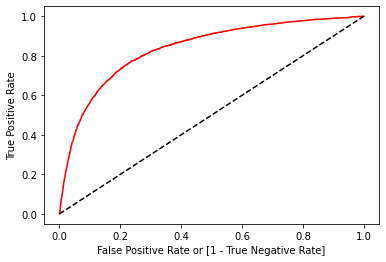

In [103]:
fpr,tpr,thresholds = roc_curve(y_train,log_model.predict_proba(x_train)[:,1])
auc = roc_auc_score(y_train,y_train_pred)
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color='red',label='logit model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()